# Gradient Boosting Classifier
* Gradient Boosting combines the strengths of multiple weak learners (typically Decision Trees) to create a stronger predictive model. It takes a sequential, additive approach to correct the errors of previous models and improves the accuracy. The following is how Gradient Boosting works:
    1. Take a shallow decision tree and train it on the data
    2. Make prediction using this weak learner
    3. Assign weights to data points based on the magnitude of pseudo-residuals ($r_i = y_i - p_i$ where $r_i$ is the ith residual, $y_i$ is the class label of the ith data point, and $p_i$ is the predicted probability of that class for the ith data point)
    4. Another weak learner is fitted on this weighted data, focusing more on points that were poorly predicted
    5. Repeat 3-4 until stopping criteria is met
    6. Final predictions is generated using a weighted average of all the weak learners - weights are usually determined by the performance of each weak learner on the training data and pseudo-residuals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Generate data
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

# Create a Gradient Boosting Regressor
model = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_gb = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_gb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Best Estimators: {best_gb.n_estimators}")
print(f"Best Learning Rate: {best_gb.learning_rate}")
print(f"Best Max Depth: {best_gb.max_depth}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Best Estimators: 50
Best Learning Rate: 0.1
Best Max Depth: 5
Accuracy: 0.93
F1: 0.93
Precision: 0.93
Recall: 0.93


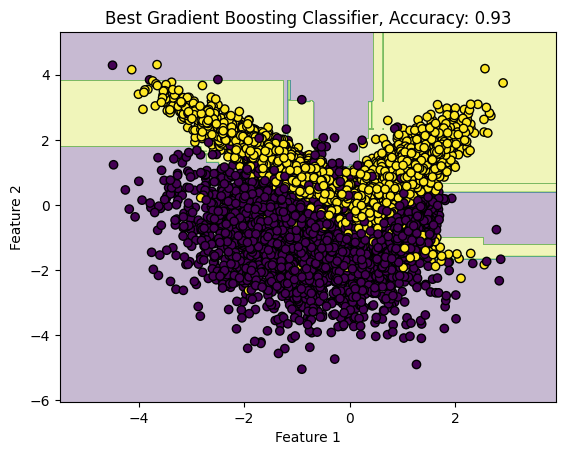

In [5]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = best_gb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Best Gradient Boosting Classifier, Accuracy: {accuracy:.2f}')
plt.show()